Random numbers fetched successfully. Visualizing...


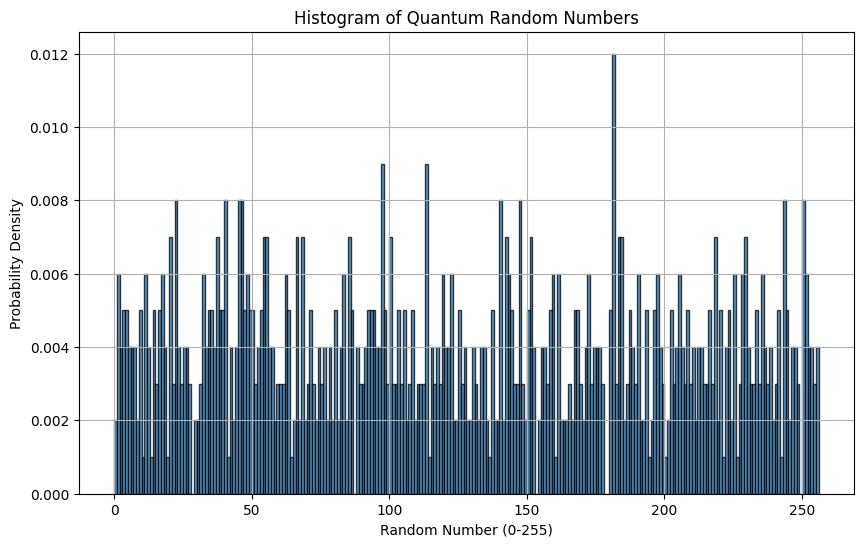

In [1]:
#!/usr/bin/env python3
"""
This script fetches 1000 true random numbers (in the range 0-255)
from the ANU Quantum Random Numbers API and then plots a histogram
to visualize their distribution.

Note: The ANU API is a free online TRNG service provided by the
Australian National University.
"""

import requests
import matplotlib.pyplot as plt

def fetch_quantum_random_numbers(length=1000, data_type="uint8"):
    """
    Fetch a list of quantum random numbers from the ANU QRNG API.

    Parameters:
        length (int): Number of random numbers to fetch.
        data_type (str): Data type of the random numbers (e.g., "uint8").

    Returns:
        list: A list of integers representing random numbers.
    """
    # API endpoint URL (change length if you need more/less numbers)
    url = f"https://qrng.anu.edu.au/API/jsonI.php?length={length}&type={data_type}"

    try:
        response = requests.get(url)
        response.raise_for_status()  # Raise an error for bad status codes
        json_data = response.json()
        # 'data' field contains the list of random numbers
        random_numbers = json_data.get("data", [])
        if not random_numbers:
            raise ValueError("No random numbers were returned by the API.")
        return random_numbers
    except Exception as e:
        print(f"Error fetching random numbers: {e}")
        return []

def visualize_numbers(numbers):
    """
    Visualize the random numbers using a histogram.

    Parameters:
        numbers (list): List of random numbers.
    """
    plt.figure(figsize=(10, 6))
    # Create bins from 0 to 256 so each integer [0,255] has its own bin.
    bins = range(0, 257)
    plt.hist(numbers, bins=bins, density=True, edgecolor='black', alpha=0.75)
    plt.xlabel('Random Number (0-255)')
    plt.ylabel('Probability Density')
    plt.title('Histogram of Quantum Random Numbers')
    plt.grid(True)
    plt.show()

def main():
    # Fetch 1000 random numbers
    numbers = fetch_quantum_random_numbers(length=1000)
    if numbers:
        print("Random numbers fetched successfully. Visualizing...")
        visualize_numbers(numbers)
    else:
        print("Failed to fetch random numbers.")

if __name__ == '__main__':
    main()
